In [0]:
# Widen width of notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Import Dependencies

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [0]:
# import matplotlib as mpl
# params = {'axes.titlesize':'20',
#           'xtick.labelsize':'12',
#           'ytick.labelsize':'12'}
# mpl.rcParams.update(params)
# mpl.rcParams.update(mpl.rcParamsDefault)  # to revert to default settings

# Load Datasets (<u>red</u> and <u>white</u> wine)

In [0]:
red_wine   = pd.read_csv('winequality-red.csv',   sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

In [0]:
red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [0]:
white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

------

# <center>Feature Engineering</center>
<center>Create new columns with hand-engineered features.</center>

![Cat Engineer](https://jovianlin.io/content/images/2018/04/furious-typing-cat.gif)

### <span style="color:blue">F.E. #1</span>: Add a New Column "<span style="color:blue">wine_type</span>"

In [0]:
# store wine type as an attribute
red_wine['wine_type']   = 'red'   
white_wine['wine_type'] = 'white'

In [0]:
red_wine.head(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4               0.7          0.0             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5       red

In [0]:
white_wine.head(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   

   alcohol  quality wine_type  
0      8.8        6     white

### <span style="color:blue">F.E. #2</span>: Add a New Column "<span style="color:blue">quality_label</span>"

First, let's take a peek at all the unique values of the column "**`quality`**" 

In [0]:
print('red_wine\'s list of "quality":\t', sorted(red_wine['quality'].unique()))
print('white_wine\'s list of "quality":\t', sorted(red_wine['quality'].unique()))

red_wine's list of "quality":	 [3, 4, 5, 6, 7, 8]
white_wine's list of "quality":	 [3, 4, 5, 6, 7, 8]


### Bucket "quality" (numerical) scores into "<span style="color:blue">quality labels</span>" (categorical)

In [0]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high'])

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])

In [0]:
red_wine.head(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4               0.7          0.0             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type quality_label  
0      9.4        5       red           low

In [0]:
white_wine.head(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   

   alcohol  quality wine_type quality_label  
0      8.8        6     white        medium

### Preview `value_counts()` of red and white wines:

In [0]:
print(red_wine['quality_label'].value_counts())
print()
print(white_wine['quality_label'].value_counts())

medium    837
low       744
high       18
Name: quality_label, dtype: int64

medium    3078
low       1640
high       180
Name: quality_label, dtype: int64


### Merge red and white wine datasets

In [0]:
wines = pd.concat([red_wine, white_wine], axis=0,)
wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type quality_label  
0      9.4        5       red           low  
1      9.8        5       red           low  
2      9.8        5       red           low  
3      9.8        6       red        medium  
4      9.4        5       red           low

### Re-shuffle records just to randomize data points

- **`drop=True`**: this resets the index to the default integer index

In [0]:
wines.shape

(6497, 14)

In [0]:
# Shuffle
wines = wines.sample(frac=1.0, random_state=42).reset_index(drop=True)
wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.17         0.74            12.8      0.045   
1            7.7              0.64         0.21             2.2      0.077   
2            6.8              0.39         0.34             7.4      0.020   
3            6.3              0.28         0.47            11.2      0.040   
4            7.4              0.35         0.20            13.9      0.054   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 24.0                 126.0  0.99420  3.26       0.38   
1                 32.0                 133.0  0.99560  3.27       0.45   
2                 38.0                 133.0  0.99212  3.18       0.44   
3                 61.0                 183.0  0.99592  3.12       0.51   
4                 63.0                 229.0  0.99888  3.11       0.50   

   alcohol  quality wine_type quality_label  
0     12.2        8     white          high  
1      9.9        5       red           low  
2     12.0        7     white        medium  
3      9.5        6     white        medium  
4      8.9        6     white        medium

In [0]:
wines.shape

(6497, 14)

In [0]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
quality_label           0
dtype: int64

In [0]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
wine_type               6497 non-null object
quality_label           6497 non-null category
dtypes: category(1), float64(11), int64(1), object(1)
memory usage: 666.4+ KB


---

### Understanding Wine and Types

Wine is an alcoholic beverage made from grapes which is fermented without the addition of sugars, acids, enzymes, water, or other nutrients.

Red wine is made from dark red and black grapes. The color usually ranges from various shades of red, brown and violet. This is produced with whole grapes including the skin which adds to the color and flavor of red wines, giving it a rich flavor.

White wine is made from white grapes with no skins or seeds. The color is usually straw-yellow, yellow-green, or yellow-gold. Most white wines have a light and fruity flavor as compared to richer red wines.

### Understanding Wine Attributes and Properties 


- **fixed acidity:** Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine. Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). This variable is usually expressed in $\frac{g(tartaricacid)}{dm^3}$ in the dataset.


- **volatile acidity:** These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor. In the US, the legal limits of volatile acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. The volatile acidity is expressed in $\frac{g(aceticacid)}{dm^3}$ in the dataset.


- **citric acid:** This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness. It's usually expressed in $\frac{g}{dm^3}$ in the dataset.


- **residual sugar:** This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped. It's usually expressed in $\frac{g}{dm^3}$ in the dataset.


- **chlorides:** This is usually a major contributor to saltiness in wine. It's usually expressed in $\frac{g(sodiumchloride)}{dm^3}$ in the dataset.


- **free sulfur dioxide:** This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. This variable is expressed in $\frac{mg}{dm^3}$ in the dataset.


- **total sulfur dioxide:** This is the sum total of the bound and the free sulfur dioxide ($SO_2$). Here, it's expressed in $\frac{mg}{dm^3}$. This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.


- **density:** This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. Here, it's expressed in $\frac{g}{cm^3}$.


- **pH:** Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.


- **sulphates:** These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavor. Here, it's expressed in $\frac{g(potassiumsulphate)}{dm^3}$ in the dataset.


- **alcohol:** Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. Hence it is not a surprise for this attribute to be a part of this dataset. It's usually measured in % vol or alcohol by volume (ABV).


- **quality:** Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.


- **wine_type:** Since we originally had two datasets for red and white wine, we introduced this attribute in the final merged dataset which indicates the type of wine for each data point. A wine can either be a 'red' or a 'white' wine. One of the predictive models we will build in this chapter would be such that we can predict the type of wine by looking at other wine attributes.


- **quality_label:** This is a derived attribute from the `quality` attribute. We bucket or group wine quality scores into three qualitative buckets namely low, medium and high. Wines with a quality score of 3, 4 & 5 are low quality, scores of 6 & 7 are medium quality and scores of 8 & 9 are high quality wines. We will also build another model in this chapter to predict this wine quality label based on other wine attributes. 

---------

# <center>Exploratory Data Analysis and Visualizations</center>

![Cats Exploring](https://jovianlin.io/content/images/2018/04/cats-exploring.gif)

## Descriptive Statistics

Apply "Descriptive Statistics" using `describe()` on a subset of attributes.

In [0]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 
                     'sulphates', 'alcohol', 
                     'volatile acidity', 'quality']

In [0]:
rs = round(red_wine[subset_attributes].describe(), 2)
rs

residual sugar  total sulfur dioxide  sulphates  alcohol  \
count         1599.00               1599.00    1599.00  1599.00   
mean             2.54                 46.47       0.66    10.42   
std              1.41                 32.90       0.17     1.07   
min              0.90                  6.00       0.33     8.40   
25%              1.90                 22.00       0.55     9.50   
50%              2.20                 38.00       0.62    10.20   
75%              2.60                 62.00       0.73    11.10   
max             15.50                289.00       2.00    14.90   

       volatile acidity  quality  
count           1599.00  1599.00  
mean               0.53     5.64  
std                0.18     0.81  
min                0.12     3.00  
25%                0.39     5.00  
50%                0.52     6.00  
75%                0.64     6.00  
max                1.58     8.00

In [0]:
ws = round(white_wine[subset_attributes].describe(), 2)
ws

residual sugar  total sulfur dioxide  sulphates  alcohol  \
count         4898.00               4898.00    4898.00  4898.00   
mean             6.39                138.36       0.49    10.51   
std              5.07                 42.50       0.11     1.23   
min              0.60                  9.00       0.22     8.00   
25%              1.70                108.00       0.41     9.50   
50%              5.20                134.00       0.47    10.40   
75%              9.90                167.00       0.55    11.40   
max             65.80                440.00       1.08    14.20   

       volatile acidity  quality  
count           4898.00  4898.00  
mean               0.28     5.88  
std                0.10     0.89  
min                0.08     3.00  
25%                0.21     5.00  
50%                0.26     6.00  
75%                0.32     6.00  
max                1.10     9.00

In [0]:
pd.concat([rs, ws], 
          axis=1, 
          keys=['🔴Red Wine Statistics', '⚪️White Wine Statistics'])

🔴Red Wine Statistics                                          \
            residual sugar total sulfur dioxide sulphates  alcohol   
count              1599.00              1599.00   1599.00  1599.00   
mean                  2.54                46.47      0.66    10.42   
std                   1.41                32.90      0.17     1.07   
min                   0.90                 6.00      0.33     8.40   
25%                   1.90                22.00      0.55     9.50   
50%                   2.20                38.00      0.62    10.20   
75%                   2.60                62.00      0.73    11.10   
max                  15.50               289.00      2.00    14.90   

                                ⚪️White Wine Statistics                       \
      volatile acidity  quality          residual sugar total sulfur dioxide   
count          1599.00  1599.00                 4898.00              4898.00   
mean              0.53     5.64                    6.39               138.36   
std               0.18     0.81                    5.07                42.50   
min               0.12     3.00                    0.60                 9.00   
25%               0.39     5.00                    1.70               108.00   
50%               0.52     6.00                    5.20               134.00   
75%               0.64     6.00                    9.90               167.00   
max               1.58     8.00                   65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [0]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']

ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(), 2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(), 2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(), 2)

pd.concat([ls, ms, hs], 
          axis=1, 
          keys=['👎Low Quality Wine', '👌Medium Quality Wine', '👍High Quality Wine'])

👎Low Quality Wine                                     \
                alcohol volatile acidity       pH  quality   
count           2384.00          2384.00  2384.00  2384.00   
mean               9.87             0.40     3.21     4.88   
std                0.84             0.19     0.16     0.36   
min                8.00             0.10     2.74     3.00   
25%                9.30             0.26     3.11     5.00   
50%                9.60             0.34     3.20     5.00   
75%               10.40             0.50     3.31     5.00   
max               14.90             1.58     3.90     5.00   

      👌Medium Quality Wine                                     \
                   alcohol volatile acidity       pH  quality   
count              3915.00          3915.00  3915.00  3915.00   
mean                 10.81             0.31     3.22     6.28   
std                   1.20             0.14     0.16     0.45   
min                   8.40             0.08     2.72     6.00   
25%                   9.80             0.21     3.11     6.00   
50%                  10.80             0.27     3.21     6.00   
75%                  11.70             0.36     3.33     7.00   
max                  14.20             1.04     4.01     7.00   

      👍High Quality Wine                                   
                 alcohol volatile acidity      pH quality  
count             198.00           198.00  198.00  198.00  
mean               11.69             0.29    3.23    8.03  
std                 1.27             0.12    0.16    0.16  
min                 8.50             0.12    2.88    8.00  
25%                11.00             0.21    3.13    8.00  
50%                12.00             0.28    3.23    8.00  
75%                12.60             0.35    3.33    8.00  
max                14.00             0.85    3.72    9.00

It’s quite easy to contrast and compare these statistical measures for the different types of wine samples. 

Notice the stark difference in some of the attributes. We will emphasize those in some of our visualizations later on.

------ 

# <center>Let's Get This Party Started</center>
![DJ Cat](https://i.ytimg.com/vi/dVRxLfBPqdA/hqdefault.jpg)

---

# 1D: Univariate Analysis

Univariate analysis is basically the simplest form of data analysis or visualization where we are only concerned with analyzing **one data attribute (or variable)** and visualizing the same (one dimension).

<center><h4>In a nutshell: <u>one data attribute/variable</u></h4></center>

## Visualizing One Dimension

One of the quickest and most effective ways to visualize all numeric data and their distributions, is to leverage <u>**histograms**</u> using `pandas`.

The plots below give a good idea about the <u>**basic data distribution**</u> of <u>**each attribute**</u> (e.g. alcohol, chlorides, citric acid, etc.).

**Note**: There are 2 attributes ("`wine_type`" and "`quality_label`") that are not plotted.

In [0]:
wines.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type                 object
quality_label           category
dtype: object

**Note**: `matplotlib` color codes: [https://matplotlib.org/examples/color/named_colors.html](https://matplotlib.org/examples/color/named_colors.html)

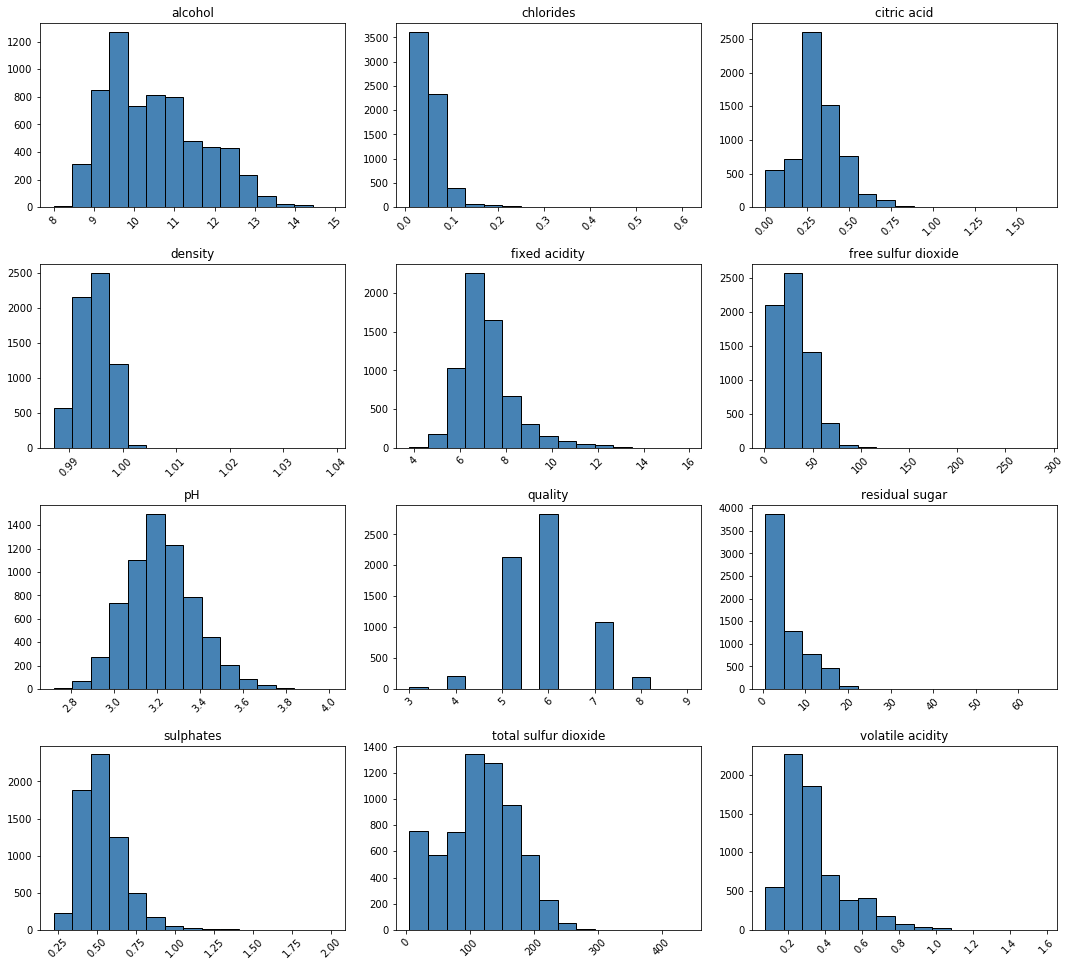

In [0]:
fig = wines.hist(bins=15,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))   

------

### 1D: Continuous <u>Numeric</u> Attribute

Let’s drill down to **visualizing one of the continuous, numeric attributes** — "`sulphates`". 

Essentially a <u>**histogram**</u> or a <u>**density plot**</u> works quite well in <u>**understanding how the data is distributed**</u> for that attribute.

#### Histogram

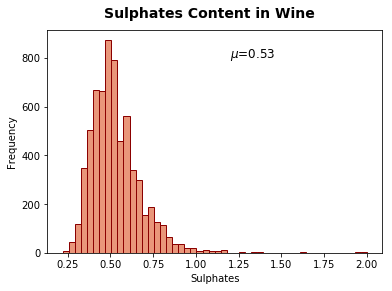

In [0]:
# Prepare the figure
fig = plt.figure( figsize=(6,4) )
title = fig.suptitle("Sulphates Content in Wine", fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)

# Prepare a subplot
ax = fig.add_subplot(1,1,1) # https://youtu.be/afITiFR6vfw?t=1m53s
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")

# Add text into the subplot
ax.text(x=1.2, 
        y=800, 
        s=r'$\mu$='+str(round(wines['sulphates'].mean(), 2)), 
        fontsize=12)

freq, bins, patches = ax.hist(wines['sulphates'], 
                              bins=50,
                              color='darksalmon', 
                              edgecolor='darkred', linewidth=1.0)

#### Density Plot

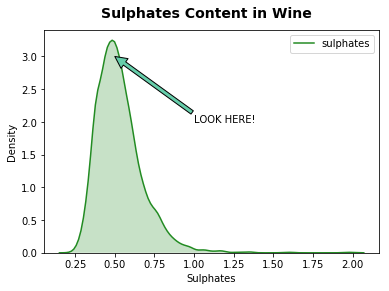

In [0]:
# Prepare the figure
fig = plt.figure( figsize=(6,4) )
title = fig.suptitle("Sulphates Content in Wine", fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)

# Prepare a subplot
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 

# Annotate: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html
ax1.annotate('LOOK HERE!', 
             xy=(0.5, 3), 
             xytext=(1.0, 2.0),
             arrowprops=dict(facecolor='mediumaquamarine')) 

# Seaborn time!
sns.kdeplot(wines['sulphates'], 
            ax=ax1, 
            shade=True, 
            color='forestgreen')

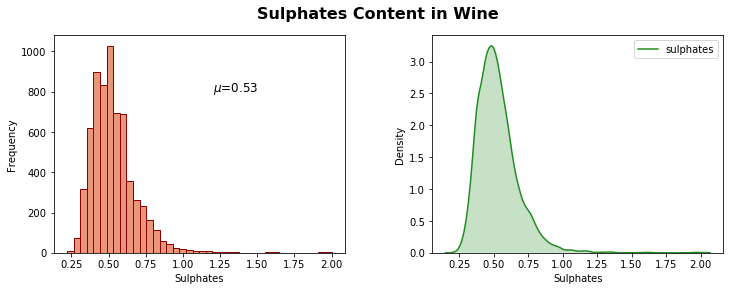

In [0]:
fig = plt.figure(figsize = (12,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=16, fontweight='bold')
fig.subplots_adjust(top=0.88, wspace=0.3)

#===========#
# Histogram #
#===========#
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency")

ax1.text(x=1.2, y=800, 
         s=r'$\mu$='+str(round(wines['sulphates'].mean(),2)), 
         fontsize=12)

freq, bins, patches = ax1.hist(wines['sulphates'], 
                               bins=40,
                               color='darksalmon',
                               edgecolor='darkred', linewidth=1)

#==============#
# Density Plot #
#==============#
ax2 = fig.add_subplot(1,2,2) # ax1.twinx() # https://youtu.be/OebyvmZo3w0?t=1m42s
#ax2 = ax1.twinx() # https://youtu.be/OebyvmZo3w0?t=1m42s
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density") 
sns.kdeplot(wines['sulphates'], ax=ax2, shade=True, color='forestgreen')

#=============#
# Save Figure #
#=============#
fig.savefig('suplhates_content_in_wine_side-by-side.jpg')

------

### 1D: Discrete <u>Categorical</u> Attribute

In [0]:
wines.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type                 object
quality_label           category
dtype: object

In [0]:
wines['wine_type'].value_counts()

white    4898
red      1599
Name: wine_type, dtype: int64

In [0]:
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))

In [0]:
print( w_q[0] )
print( w_q[1] )

[6, 5, 7, 4, 8, 3, 9]
[2836, 2138, 1079, 216, 193, 30, 5]


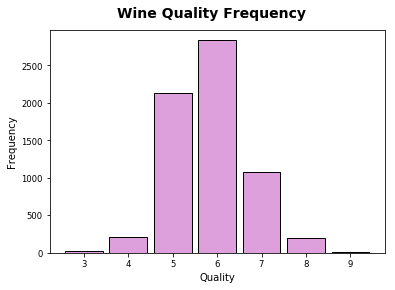

In [0]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
ax.tick_params(axis='both', which='major', labelsize=8.5)

bar = ax.bar(left = w_q[0],   # i.e. [6, 5, 7, 4, 8, 3, 9]
             height = w_q[1], # i.e. [2836, 2138, 1079, 216, 193, 30, 5]
             width = 0.85,
             color = 'plum', 
             edgecolor='black', linewidth=1)

------

# N-D: Multivariate Analysis

- Multivariate analysis is where the fun as well as the complexity begins. 
- Here we analyze multiple data dimensions or attributes (2 or more). 
- Multivariate analysis not only involves just checking out distributions but also potential relationships, patterns and correlations amongst these attributes. 
- You can also leverage inferential statistics and hypothesis testing if necessary based on the problem to be solved at hand to check out statistical significance for different attributes, groups and so on.

------

# 2D: Visualizing Data in Two Dimensions

One of the best ways to check out potential relationships or correlations amongst the different data attributes is to leverage a <u>**pair-wise correlation matrix**</u> and depict it as a <u>**heatmap**</u>.

### 2D: <u>Heatmap</u> on Pair-Wise <u>Correlation Matrix</u>

In [0]:
# Compute pairwise correlation of columns, excluding NA/null values
corr = wines.corr()
corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   

                       alcohol   quality  
fixed acidity        -0.095452 -0.076743  
volatile acidity     -0.037640 -0.265699  
citric acid          -0.010493  0.085532  
residual sugar       -0.359415 -0.036980  
chlorides            -0.256916 -0.200666  
free sulfur dioxide  -0.179838  0.055463  
total sulfur dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121248  0.019506  
sulphates            -0.003029  0.038485  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

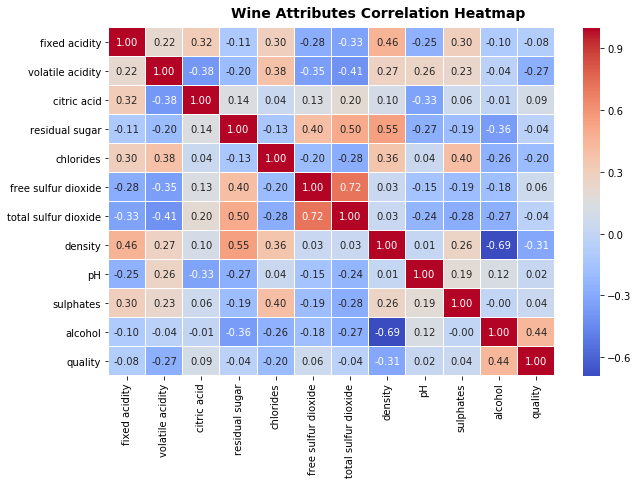

In [0]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

hm = sns.heatmap(round(corr,2), 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 #annot_kws={"size": 14},
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('Wine Attributes Correlation Heatmap', fontsize=14, fontweight='bold')

- The gradients in the heatmap vary based on the strength of the correlation. 
- You can clearly see it is very easy to spot potential attributes having strong correlations amongst themselves.

---

### 2D: Pair-Wise <u>Scatter Plots</u>

Another way to visualize the same is to use <u>**pair-wise scatter plots**</u> amongst attributes of interest.

**Note**: The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

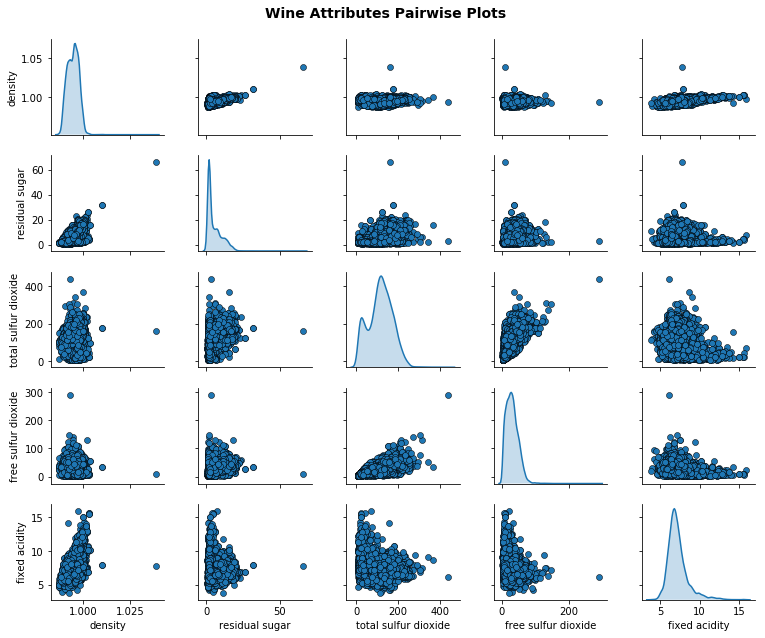

In [0]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'free sulfur dioxide', 'fixed acidity']

pp = sns.pairplot(wines[cols], 
                  size=1.8, aspect=1.2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14, fontweight='bold')

#### Fit linear regression models to the scatter plots: 

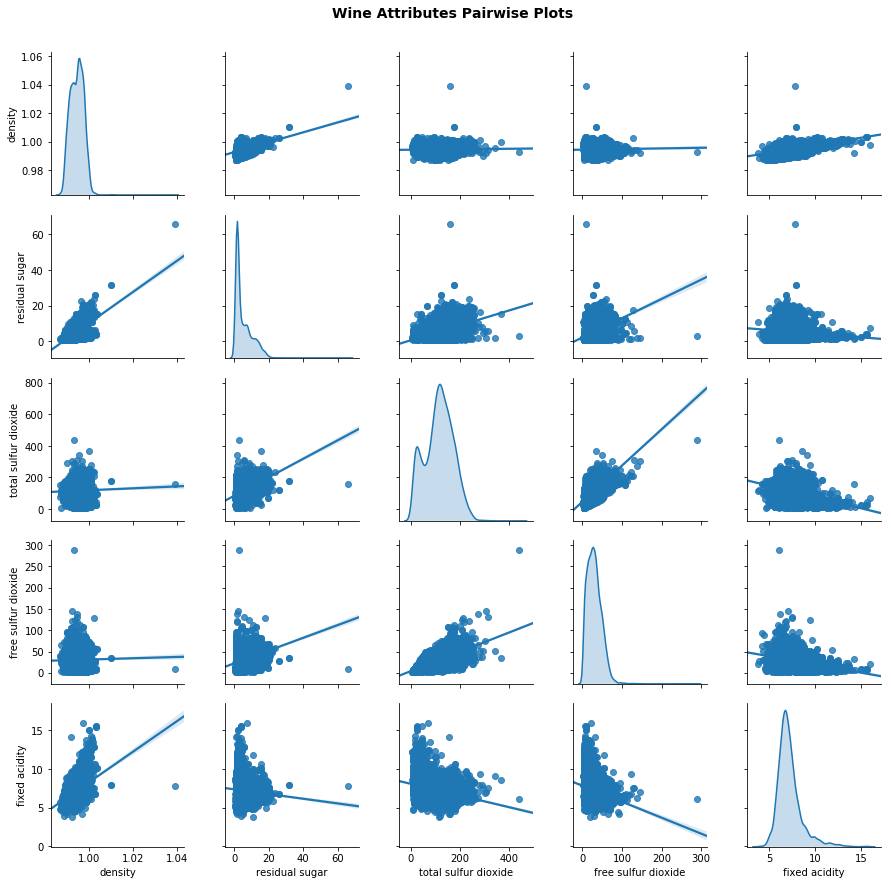

In [0]:
pp = sns.pairplot(wines[cols], 
                  diag_kind="kde", diag_kws=dict(shade=True),
                  kind="reg") # <-- Fit linear regression models to the scatter plots
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14, fontweight='bold')

Based on the above plot, you can see that scatter plots are also a decent way of <u>**observing potential relationships**</u> or patterns in two-dimensions for data attributes. 

---

### 2D: Parallel Coordinates

Another way of visualizing multivariate data for multiple attributes together is to use <u>**parallel coordinates**</u>.

More about parallel coordinates: [https://github.com/matloff/parcoordtutorial](https://github.com/matloff/parcoordtutorial)

In [0]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'free sulfur dioxide', 'fixed acidity']
subset_df = wines[cols]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['wine_type']], axis=1)
final_df.head()

density  residual sugar  total sulfur dioxide  free sulfur dioxide  \
0 -0.165631        1.546371              0.181456            -0.367664   
1  0.301278       -0.681719              0.305311             0.083090   
2 -0.859324        0.411306              0.305311             0.421155   
3  0.408001        1.210056              1.189993             1.717074   
4  1.395180        1.777588              2.003900             1.829762   

   fixed acidity wine_type  
0      -0.166089     white  
1       0.373895       red  
2      -0.320370     white  
3      -0.706073     white  
4       0.142473     white

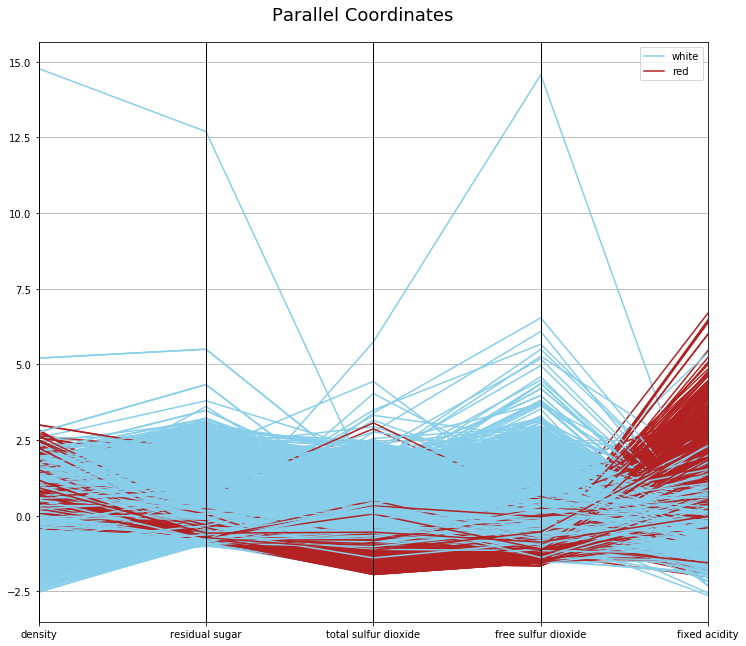

In [0]:
from pandas.plotting import parallel_coordinates

fig = plt.figure(figsize = (12, 10))
title = fig.suptitle("Parallel Coordinates", fontsize=18)
fig.subplots_adjust(top=0.93, wspace=0)

pc = parallel_coordinates(final_df, 'wine_type', color=('skyblue', 'firebrick'))

Basically, in this visualization as depicted above, points are represented as connected line segments. 

- Each vertical line represents one data attribute. 
- One complete set of connected line segments across all the attributes represents one data point. 
- Hence points that tend to cluster will appear closer together. 

Just by looking at it, 
- we can clearly see that density is slightly more for red wines as compared to white wines. 
- Also "**residual sugar**" and "**total sulfur dioxide**" is higher for white wines as compared to red...
- .. while "**fixed acidity**" is higher for red wines as compared to white wines.

Check out the statistics from the statistic table we derived earlier to validate this assumption!

#### NOTE: If you don't perform scaling beforehand, this is what you'll get:

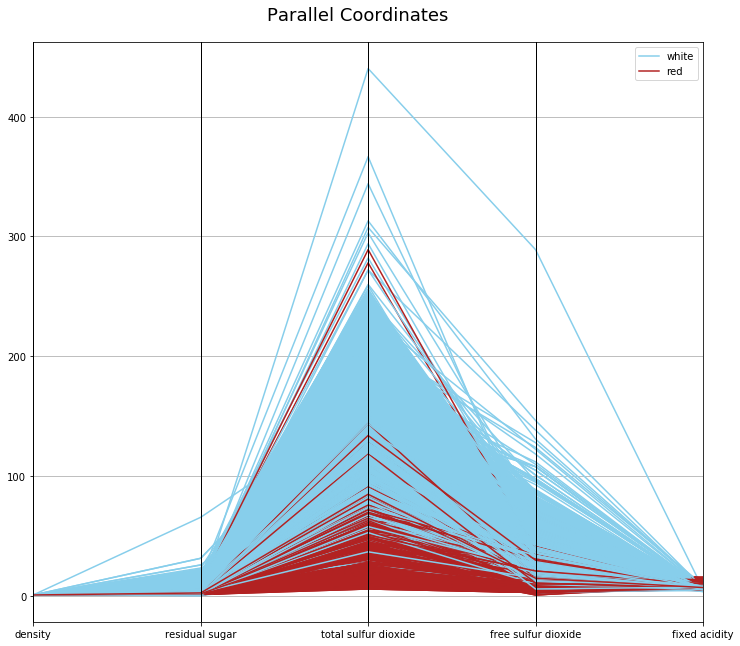

In [0]:
# If you don't perform scaling beforehand... 
# This is what you'll get...
fig = plt.figure(figsize = (12, 10))
title = fig.suptitle("Parallel Coordinates", fontsize=18)
fig.subplots_adjust(top=0.93, wspace=0)

new_cols = ['density', 'residual sugar', 'total sulfur dioxide', 'free sulfur dioxide', 'fixed acidity', 'wine_type']
pc = parallel_coordinates(wines[new_cols], 'wine_type', color=('skyblue', 'firebrick'))

------

### 2D: Two Continuous <u>Numeric</u> Attributes 

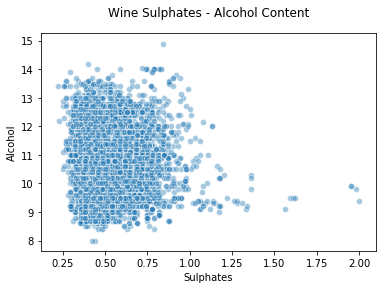

In [0]:
plt.scatter(wines['sulphates'], 
            wines['alcohol'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content', y=1.05)

#### Alternatively, use <u>Seaborn</u>

[https://seaborn.pydata.org/generated/seaborn.jointplot.html](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

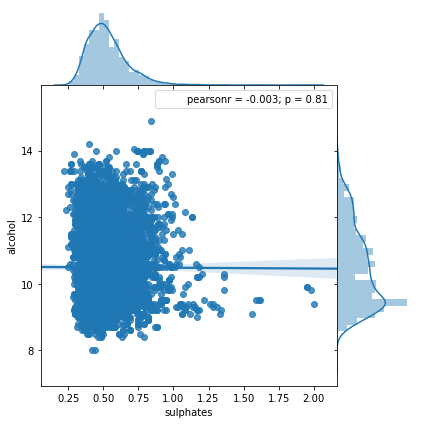

In [0]:
jp = sns.jointplot(x='sulphates', 
                   y='alcohol', 
                   data=wines,
                   kind='reg', # <-- Add regression and kernel density fits
                   space=0, size=6, ratio=4)

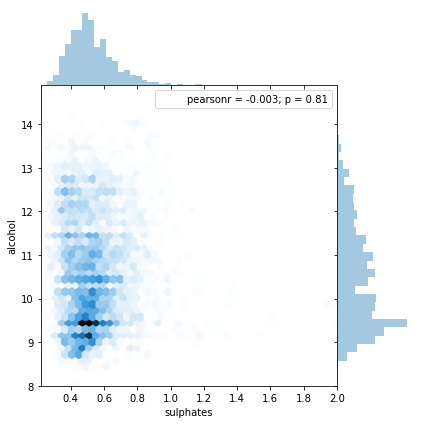

In [0]:
jp = sns.jointplot(x='sulphates', 
                   y='alcohol', 
                   data=wines,
                   kind='hex', # <-- Replace the scatterplot with a joint histogram using hexagonal bins
                   space=0, size=6, ratio=4)

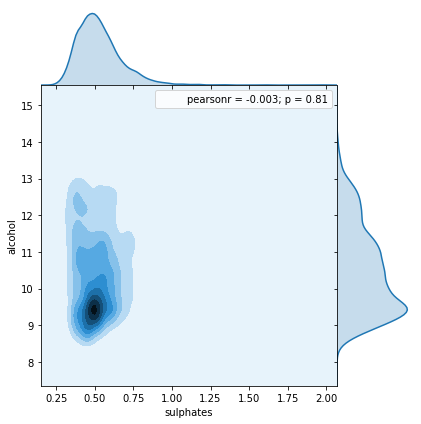

In [0]:
jp = sns.jointplot(x='sulphates', 
                   y='alcohol', 
                   data=wines,
                   kind='kde', # <-- KDE
                   space=0, size=6, ratio=4)

------

### 2D: Two Discrete <u>Categorical</u> Attributes 

How about visualizing <u>**two discrete, categorical attributes**</u>? 

One way is to leverage separate plots (subplots) or facets for one of the categorical dimensions.

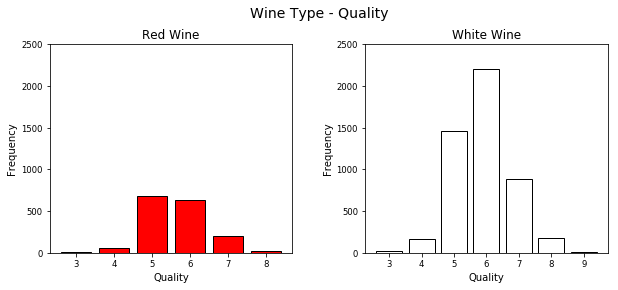

In [0]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
               edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
               edgecolor='black', linewidth=1)

### 2D: Two Discrete <u>Categorical</u> Attributes — <u>Seaborn</u> Alternative

While this is a good way to visualize categorical data, as you can see, leveraging matplotlib has resulted in writing a lot of code. 

Another good way is to use <u>**stacked bars**</u> or <u>**multiple bars**</u> for the different attributes in a single plot. We can leverage seaborn for the same easily.

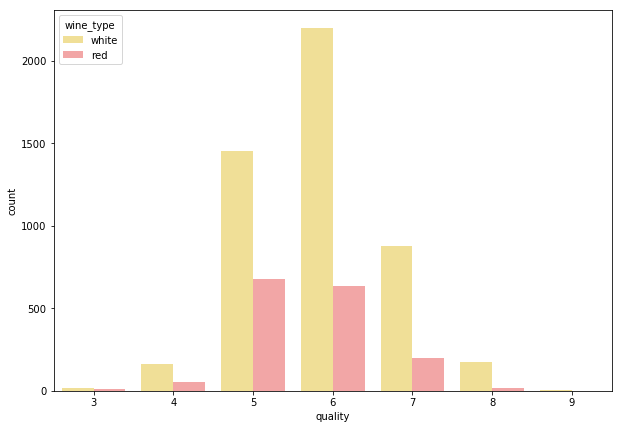

In [0]:
fig = plt.figure(figsize = (10, 7))

cp = sns.countplot(x="quality", hue="wine_type", data=wines, 
                   palette={"red": "#FF9999", "white": "#FFE888"})

This definitely looks cleaner and you can also effectively compare the different categories easily from this single plot.

------

### 2D: Mixed Attributes (<u>Numeric</u> & <u>Categorical</u>)

Let’s look at **visualizing mixed attributes in 2-D** (essentially numeric and categorical together). 

One way is to use **faceting/subplots** along with generic **histograms** or **density plots**.

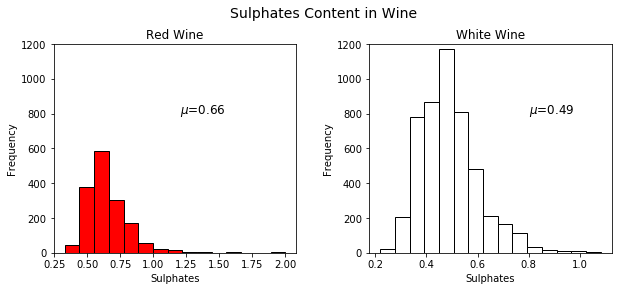

In [0]:
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='red', bins=15,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='white', bins=15,
                                     edgecolor='black', linewidth=1)

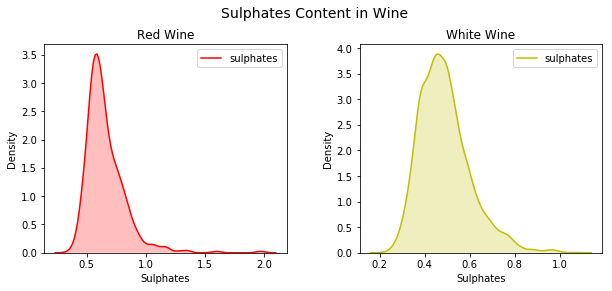

In [0]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 
sns.kdeplot(red_wine['sulphates'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density") 
sns.kdeplot(white_wine['sulphates'], ax=ax2, shade=True, color='y')

### 2D: Mixed Attributes (Numeric & Categorical) —<u>Seaborn</u> Alternative

While this is good, once again we have a lot of boilerplate code which we can avoid by leveraging <u>**seaborn**</u> and even depict the plots in one single chart.

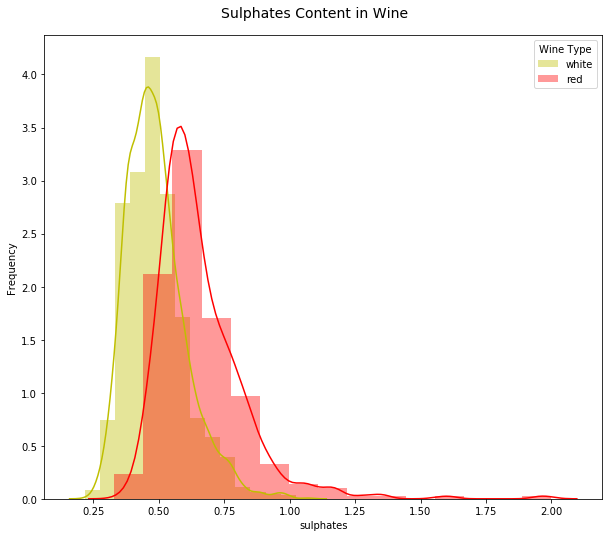

In [0]:
fig = plt.figure(figsize = (10, 8))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(wines, hue='wine_type', palette={"red": "r", "white": "y"})
g.map(sns.distplot, 'sulphates', kde=True, bins=15, ax=ax)
ax.legend(title='Wine Type')
plt.close(2)

You can see the plot generated above is clear and concise and we can easily compare across the distributions easily. 

------

### 2D: Box Plots

Besides this, box plots are another way of effectively depicting groups of numeric data based on the different values in the categorical attribute. 

Box plots are a good way to know the quartile values in the data and also potential outliers.

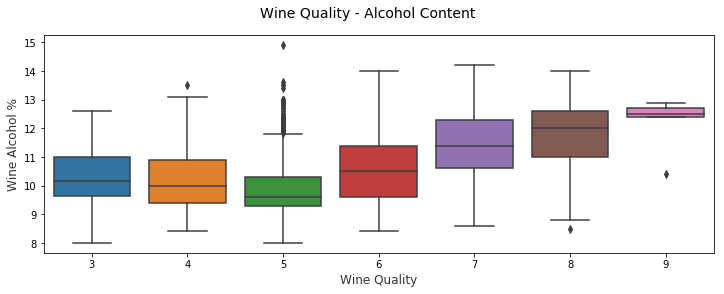

In [0]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

Another similar visualization is violin plots, which is another effective way to visualize grouped numeric data using kernel density plots (depicts probability density of the data at different values).

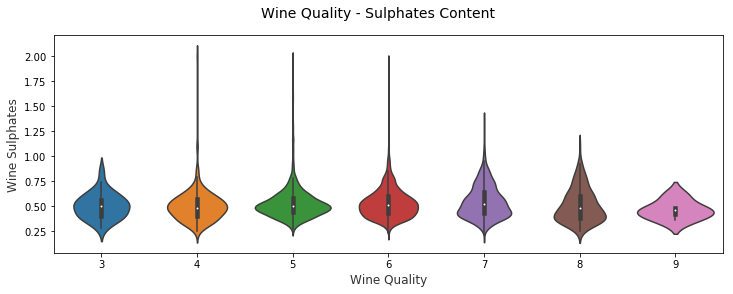

In [0]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Sulphates Content', fontsize=14)

sns.violinplot(x="quality", y="sulphates", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Sulphates",size = 12,alpha=0.8)

You can clearly see the density plots above for the different wine quality categories for wine sulphate.

### 2D: Box Plots — Alternative

In [0]:
# fig = plt.figure(figsize = (15,10))
# # title = fig.suptitle("TITLE", fontsize=14)
# fig.subplots_adjust(top=1.0, wspace=0.3)

# #==========#
# # 1st Plot #
# #==========#
# ax1 = fig.add_subplot(2,1,1)

# sns.boxplot(x="quality", y="alcohol", data=wines,  ax=ax1)
# ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
# ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

# #==========#
# # 2nd Plot #
# #==========#
# ax2 = fig.add_subplot(2,1,2)

# sns.violinplot(x="quality", y="sulphates", data=wines,  ax=ax2)
# ax2.set_xlabel("Wine Quality",size = 12,alpha=0.8)
# ax2.set_ylabel("Wine Sulphates",size = 12,alpha=0.8)

------

# 3D: Visualizing Data in Three Dimensions


- Visualizing data till two dimensions is pretty straightforward but starts becoming complex as the number of dimensions (attributes) start increasing. 
- The reason is because we are bound by the two-dimensions of our display mediums and our environment.
- For three-dimensional data, we can introduce a fake notion of <u>**depth**</u> by taking a z-axis in our chart or leveraging subplots and facets.
- However for data higher than three-dimensions, it becomes even more difficult to visualize the same. 
- The best way to go higher than three dimensions is to use **plot facets**, **color**, **shapes**, **sizes**, **depth** and so on. 
- You can also use time as a dimension by making an animated plot for other attributes over time 

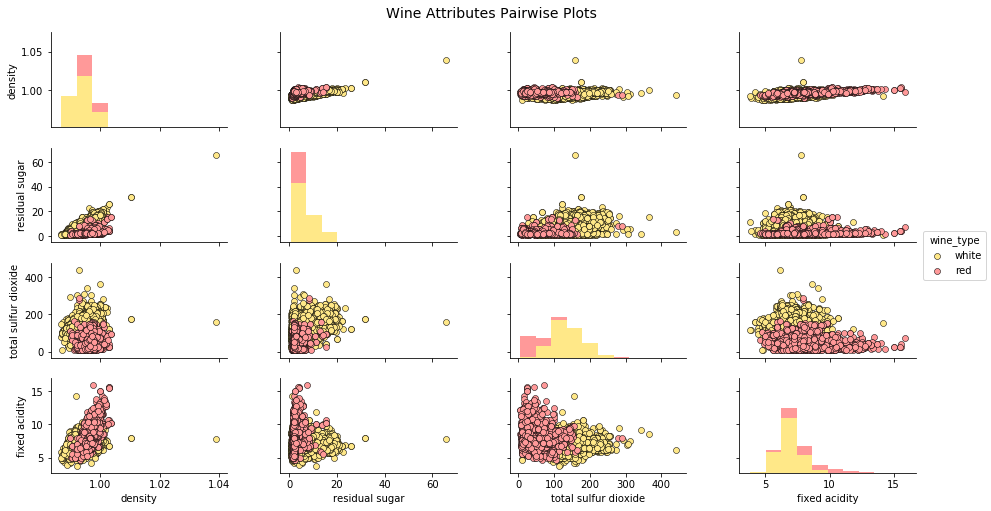

In [0]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
pp = sns.pairplot(wines[cols], 
                  hue='wine_type', # <-- LOOK HERE!
                  size=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

---

### 3D: Three Continuous <u>Numeric</u> Attributes

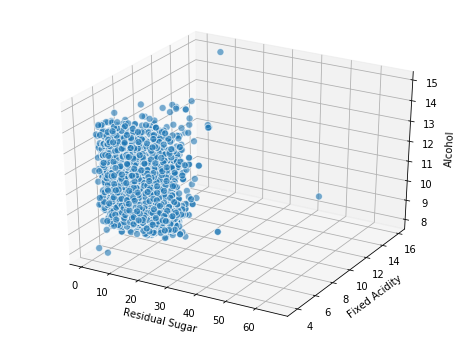

In [0]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

plt.show()

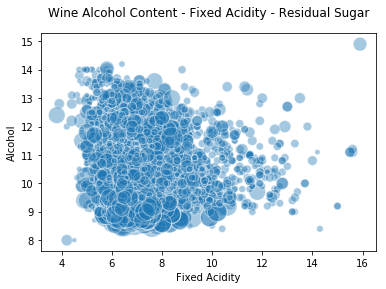

In [0]:
plt.scatter(x = wines['fixed acidity'], 
            y = wines['alcohol'], 
            s = wines['residual sugar']*25, # <-- LOOK HERE! (SIZE)
            alpha=0.4, 
            edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar', y=1.05)

---

### 3D: Three Discrete <u>Categorical</u> Attributes

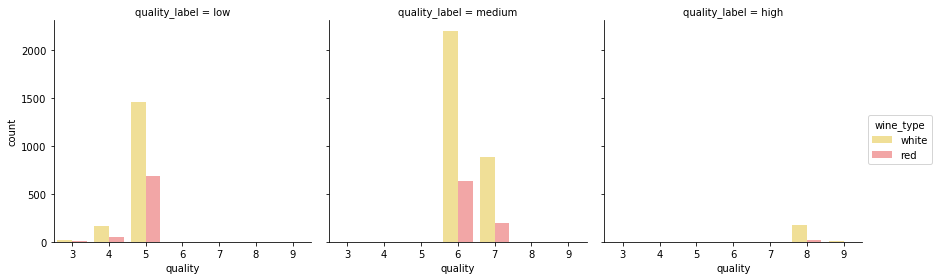

In [0]:
fc = sns.factorplot(x="quality", 
                    hue="wine_type", 
                    col="quality_label", 
                    data=wines, 
                    kind="count",
                    palette={"red": "#FF9999", "white": "#FFE888"})

---

### 3D Mixed Attributes (<u>Numeric</u> & <u>Categorical</u>)

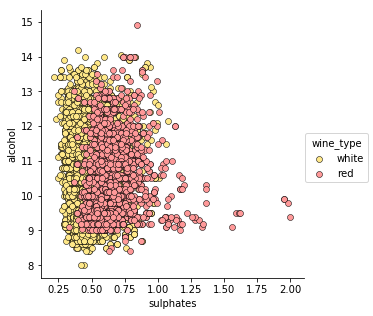

In [0]:
# Plot pairwise relationships in a dataset.
jp = sns.pairplot(wines, 
                  x_vars=["sulphates"], 
                  y_vars=["alcohol"], 
                  size=4.5,
                  hue="wine_type", # <-- LOOK HERE!
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))

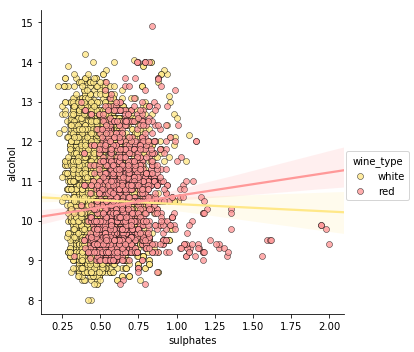

In [0]:
# Plot data and regression model fits across a FacetGrid.
lp = sns.lmplot(x='sulphates', 
                y='alcohol', 
                hue='wine_type', # <-- LOOK HERE!
                palette={"red": "#FF9999", "white": "#FFE888"},
                data=wines, 
                fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

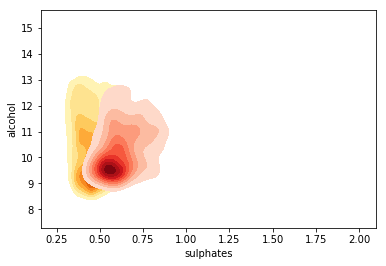

In [0]:
ax = sns.kdeplot(white_wine['sulphates'], # <-- LOOK HERE!
                 white_wine['alcohol'],   # <-- LOOK HERE!
                 cmap="YlOrBr", 
                 shade=True, shade_lowest=False)

ax = sns.kdeplot(red_wine['sulphates'], # <-- LOOK HERE!
                 red_wine['alcohol'],   # <-- LOOK HERE!
                 cmap="Reds", 
                 shade=True, shade_lowest=False)

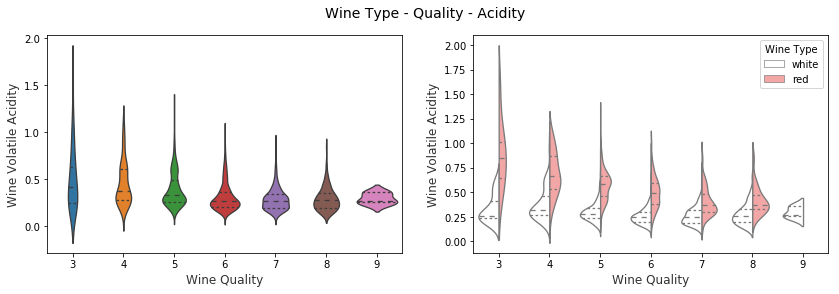

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

#############
# Left Plot #
#############
sns.violinplot(x="quality",
               y="volatile acidity",
               data=wines, 
               inner="quart", linewidth=1.3,
               ax=ax1)

ax1.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax1.set_ylabel("Wine Volatile Acidity",size=12,alpha=0.8)

##############
# Right Plot #
##############
sns.violinplot(x="quality", 
               y="volatile acidity", 
               hue="wine_type", 
               data=wines, 
               split=True, 
               inner="quart", # {"box", "quartile", "point", "stick", None} 
               linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, 
               ax=ax2)

ax2.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax2.set_ylabel("Wine Volatile Acidity",size=12,alpha=0.8)
l = plt.legend(loc='upper right', title='Wine Type')

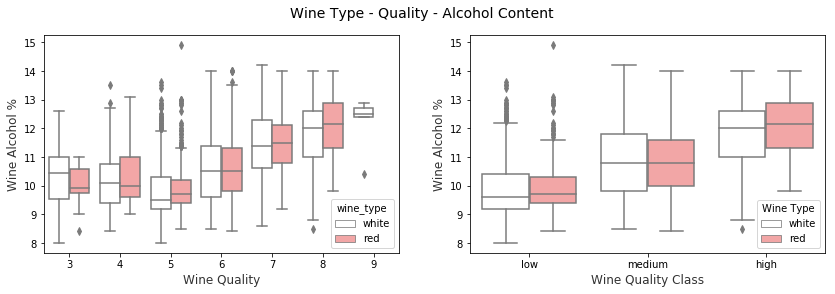

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

#############
# Left Plot #
#############
sns.boxplot(x="quality", # <-- LOOK HERE!
            y="alcohol", 
            hue="wine_type", # <-- LOOK HERE!
            data=wines, 
            palette={"red": "#FF9999", "white": "white"}, 
            ax=ax1)

ax1.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size=12,alpha=0.8)

##############
# Right Plot #
##############
sns.boxplot(x="quality_label", # <-- LOOK HERE!
            y="alcohol", 
            hue="wine_type", # <-- LOOK HERE!
            data=wines, 
            palette={"red": "#FF9999", "white": "white"}, 
            ax=ax2)

ax2.set_xlabel("Wine Quality Class",size=12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size=12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')

---

# <center>More Dimensions</center>

![Cat Asking for More](https://assets-auto.rbl.ms/b6e28825e94d881e569f9aed8d4f5c38c61597b92312361abf9deb409bbef693)

---

## 4D: Visualizing Four Dimensions

In [0]:
# fig = plt.figure(figsize=(8, 6))
# t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Type', fontsize=14)
# ax = fig.add_subplot(111, projection='3d')

# xs = list(wines['residual sugar'])
# ys = list(wines['alcohol'])
# zs = list(wines['fixed acidity'])
# data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
# colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

# for data, color in zip(data_points, colors):
#     x, y, z = data
#     ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

# ax.set_xlabel('Residual Sugar')
# ax.set_ylabel('Alcohol')
# ax.set_zlabel('Fixed Acidity')

#### Factors:

1. X position
2. Y position
3. Color
4. **Size** 😀

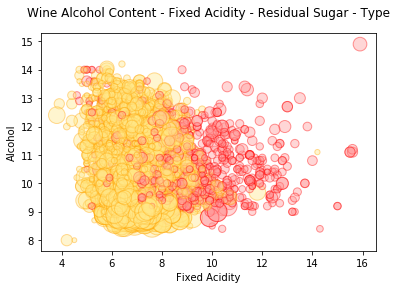

In [0]:
size = wines['residual sugar']*25
fill_colors = ['#FF9999' if wt=='red' else '#FFE888' for wt in list(wines['wine_type'])]
edge_colors = ['red' if wt=='red' else 'orange' for wt in list(wines['wine_type'])]

plt.scatter(wines['fixed acidity'], # <-- 1st DIMENSION
            wines['alcohol'],       # <-- 2nd DIMENSION
            s=size,                 # <-- 3rd DIMENSION
            color=fill_colors,      # <-- 4th DIMENSION
            alpha=0.4,             
            edgecolors=edge_colors)

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type',y=1.05)

#### Factors:

1. X position
2. Y position
3. Color
4. **_n_-Columns** 😀

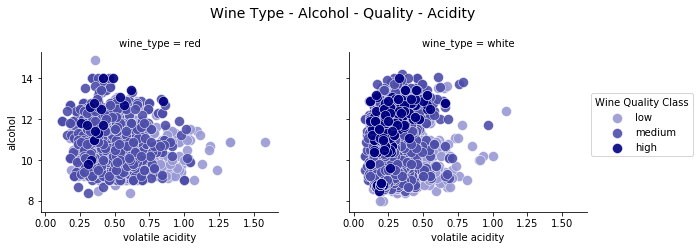

In [0]:
g = sns.FacetGrid(wines, 
                  col="wine_type",            # TWO COLUMNS coz there're TWO "wine types"
                  col_order=['red', 'white'], # -> Specify the labels
                  hue='quality_label',        # ADD COLOR
                  hue_order=['low', 'medium', 'high'],
                  aspect=1.2, 
                  size=3.5, 
                  palette=sns.light_palette('navy', 4)[1:])

g.map(plt.scatter, 
      "volatile acidity", # <-- x-axis
      "alcohol",          # <-- y-axis
      alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)

fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

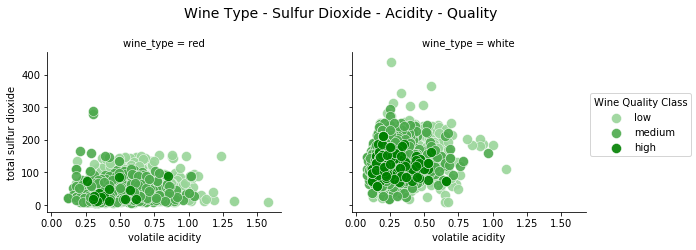

In [0]:
g = sns.FacetGrid(wines, 
                  col="wine_type",            # TWO COLUMNS coz there're TWO "wine types"
                  col_order=['red', 'white'], # -> Specify the labels
                  hue='quality_label',        # ADD COLOR
                  hue_order=['low', 'medium', 'high'],
                  aspect=1.2, 
                  size=3.5, 
                  palette=sns.light_palette('green', 4)[1:])

g.map(plt.scatter, 
      "volatile acidity",     # <-- x-axis
      "total sulfur dioxide", # <-- y-axis
      alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)

fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

--- 

## 5D: Visualizing Five Dimensions

#### Factors:

1. X position
2. Y position
3. Color
4. _n_-**Columns** 😀
5. Size

In [0]:
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type', fontsize=14)

# xs = list(wines['residual sugar'])
# ys = list(wines['alcohol'])
# zs = list(wines['fixed acidity'])
# data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

# ss = list(wines['total sulfur dioxide'])
# colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

# for data, color, size in zip(data_points, colors, ss):
#     x, y, z = data
#     ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

# ax.set_xlabel('Residual Sugar')
# ax.set_ylabel('Alcohol')
# ax.set_zlabel('Fixed Acidity')

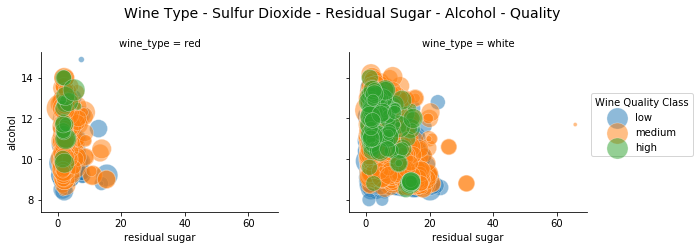

In [0]:
g = sns.FacetGrid(wines, 
                  col="wine_type",            # TWO COLUMNS coz there're TWO "wine types"
                  col_order=['red', 'white'], # -> Specify the labels
                  hue='quality_label',        # ADD COLOR
                  hue_order=['low', 'medium', 'high'],
                  aspect=1.2, 
                  size=3.5)

g.map(plt.scatter, 
      "residual sugar", # <-- x-axis
      "alcohol",        # <-- y-axis
      alpha=0.5, 
      edgecolor='white', 
      linewidth=0.5, 
      s=wines['total sulfur dioxide']*2) # <-- Size

fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

--- 

## 6D: Visualizing Six Dimensions

#### Factors:

1. X position
2. Y position
3. Color
4. _n_-Columns
5. _m_-**Rows** 😀
6. Size

In [0]:
# fig = plt.figure(figsize=(8, 6))
# t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type - Quality', fontsize=14)
# ax = fig.add_subplot(111, projection='3d')

# xs = list(wines['residual sugar'])
# ys = list(wines['alcohol'])
# zs = list(wines['fixed acidity'])
# data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

# ss = list(wines['total sulfur dioxide'])
# colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]
# markers = [',' if q == 'high' else 'x' if q == 'medium' else 'o' for q in list(wines['quality_label'])]

# for data, color, size, mark in zip(data_points, colors, ss, markers):
#     x, y, z = data
#     ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size, marker=mark)

# ax.set_xlabel('Residual Sugar')
# ax.set_ylabel('Alcohol')
# ax.set_zlabel('Fixed Acidity')

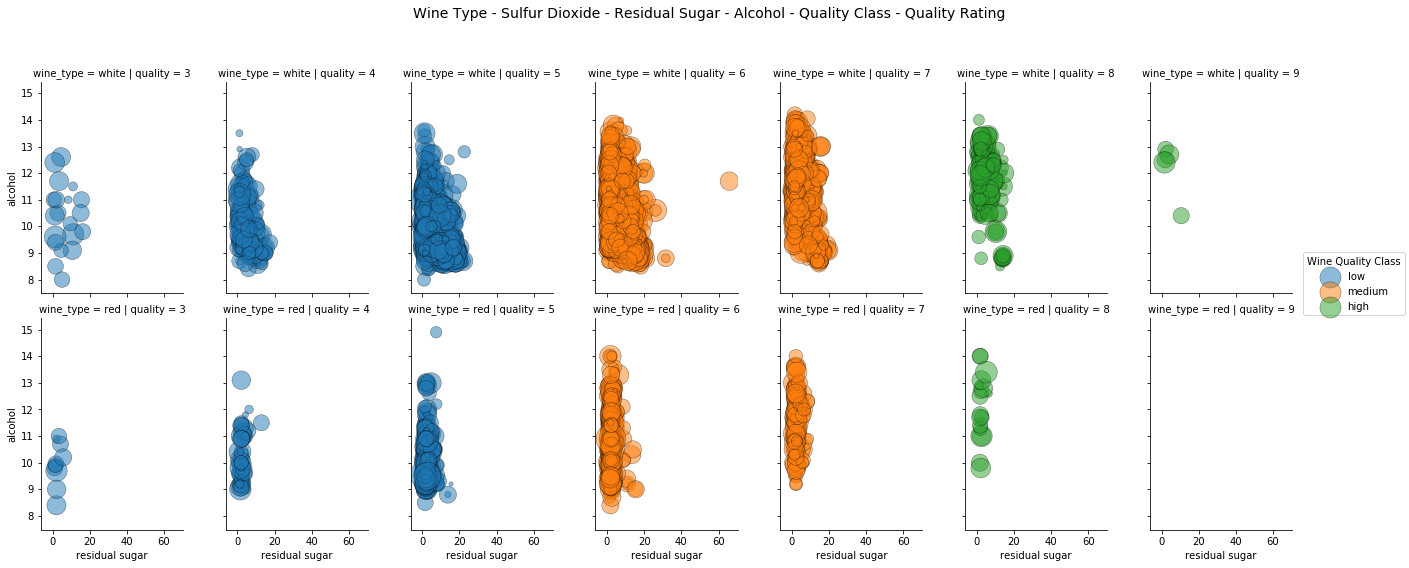

In [0]:
g = sns.FacetGrid(wines, 
                  row='wine_type',     # <-- 1) ROW
                  col="quality",       # <-- 2) COLUMN
                  hue='quality_label', # <-- 3) COLOR
                  size=4)

g.map(plt.scatter,  
      "residual sugar", # <-- 4) x-axis
      "alcohol",        # <-- 5) y-axis
      alpha=0.5, 
      edgecolor='k', 
      linewidth=0.5, 
      s=wines['total sulfur dioxide']*2) # <-- 6) Size

fig = g.fig 
fig.set_size_inches(18, 8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

# <center>~~ THE END ~~</center>

![Badass Cat](https://www.iizcat.com/uploads/2017/04/p5lla-oc.JPG)

Created by: [Jovian Lin](mailto:jovian.lin@gmail.com)

**Note**: The above contains modified codes found in [this Github repo](https://github.com/dipanjanS/practical-machine-learning-with-python/tree/master/bonus%20content/effective%20data%20visualization) as well as [this blog post](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html).

In [1]:
!tensorboard

Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 11, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python2.7/dist-packages/tensorboard/main.py", line 58, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python2.7/dist-packages/absl/app.py", line 294, in run
    flags_parser,
  File "/usr/local/lib/python2.7/dist-packages/absl/app.py", line 351, in _run_init
    flags_parser=flags_parser,
  File "/usr/local/lib/python2.7/dist-packages/absl/app.py", line 213, in _register_and_parse_flags_with_usage
    args_to_main = flags_parser(original_argv)
  File "/usr/local/lib/python2.7/dist-packages/tensorboard/program.py", line 167, in configure
    loader.fix_flags(flags)
  File "/usr/local/lib/python2.7/dist-packages/tensorboard/plugins/core/core_plugin.py", line 451, in fix_flags
    raise ValueError('A logdir or db must be specified. '
ValueError: A logdir or db must be specified. For example `tenso